In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv(r"D:\SQL\csv_files_python\1_top_paying_jobs.csv")

In [3]:
df

,job_id,job_title,job_location,job_schedule_type,salary_year_avg,job_posted_date,company_name
0,226942,Data Analyst,Anywhere,Full-time,650000.0,2023-02-20 15:13:33,Mantys
1,547382,Director of Analytics,Anywhere,Full-time,336500.0,2023-08-23 12:04:42,Meta
2,552322,Associate Director- Data Insights,Anywhere,Full-time,255829.5,2023-06-18 16:03:12,AT&T
3,99305,"Data Analyst, Marketing",Anywhere,Full-time,232423.0,2023-12-05 20:00:40,Pinterest Job Advertisements
4,1021647,Data Analyst (Hybrid/Remote),Anywhere,Full-time,217000.0,2023-01-17 00:17:23,Uclahealthcareers
5,168310,Principal Data Analyst (Remote),Anywhere,Full-time,205000.0,2023-08-09 11:00:01,SmartAsset
6,731368,"Director, Data Analyst - HYBRID",Anywhere,Full-time,189309.0,2023-12-07 15:00:13,Inclusively
7,310660,"Principal Data Analyst, AV Performance Analysis",Anywhere,Full-time,189000.0,2023-01-05 00:00:25,Motional
8,1749593,Principal Data Analyst,Anywhere,Full-time,186000.0,2023-07-11 16:00:05,SmartAsset
9,387860,ERM Data Analyst,Anywhere,Full-time,184000.0,2023-06-09 08:01:04,Get It Recruit - Information Technology


In [4]:
df_1 = df[["job_title", "salary_year_avg"]]

In [5]:
df_1

,job_title,salary_year_avg
0,Data Analyst,650000.0
1,Director of Analytics,336500.0
2,Associate Director- Data Insights,255829.5
3,"Data Analyst, Marketing",232423.0
4,Data Analyst (Hybrid/Remote),217000.0
5,Principal Data Analyst (Remote),205000.0
6,"Director, Data Analyst - HYBRID",189309.0
7,"Principal Data Analyst, AV Performance Analysis",189000.0
8,Principal Data Analyst,186000.0
9,ERM Data Analyst,184000.0


In [6]:
df_2 = df.loc[:, ("company_name", "salary_year_avg")]

In [7]:
df_2['indexes'] = df_2.groupby('company_name').cumcount()

In [8]:
df_2['company_name'] = df_2.apply(
    lambda x: f"{x['company_name']}_{x['indexes']}" if x['indexes'] > 0 else x['company_name'], 
    axis=1
)

In [9]:
df_2.drop(columns='indexes', inplace=True)

In [10]:
df_2

,company_name,salary_year_avg
0,Mantys,650000.0
1,Meta,336500.0
2,AT&T,255829.5
3,Pinterest Job Advertisements,232423.0
4,Uclahealthcareers,217000.0
5,SmartAsset,205000.0
6,Inclusively,189309.0
7,Motional,189000.0
8,SmartAsset_1,186000.0
9,Get It Recruit - Information Technology,184000.0


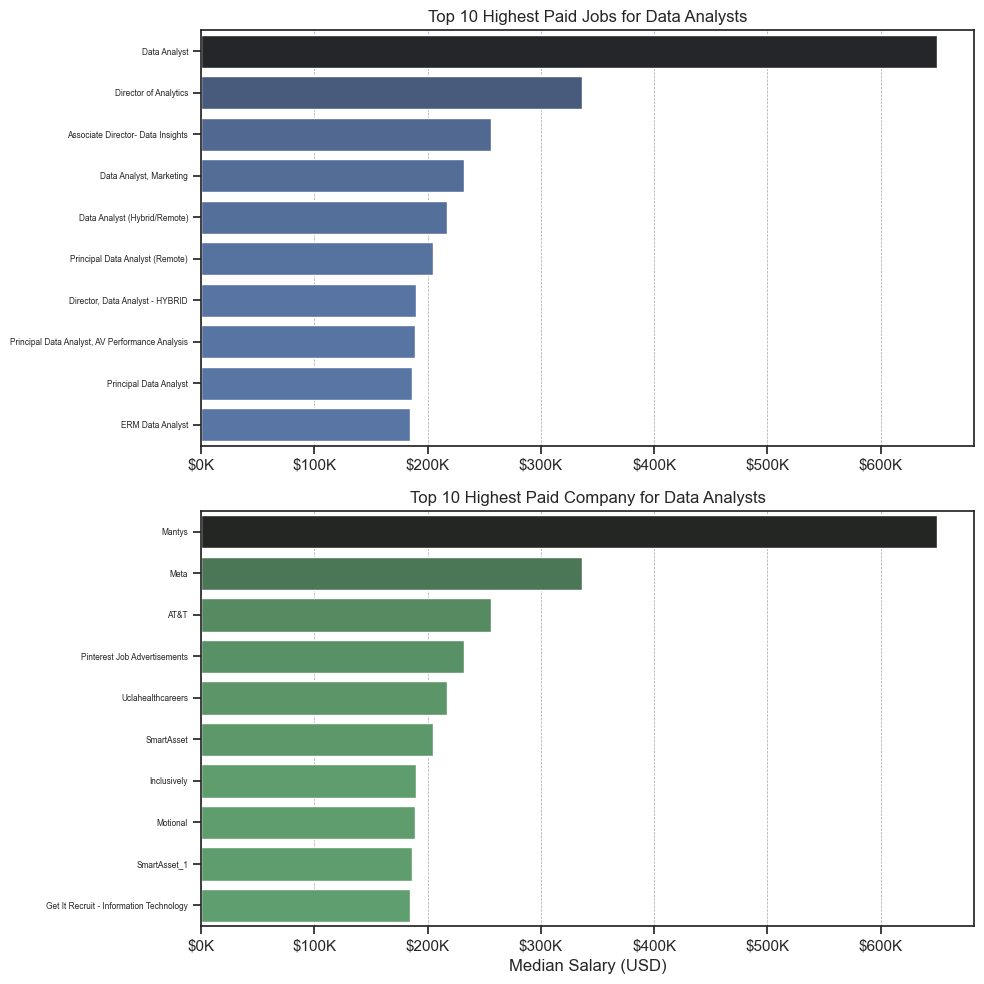

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

sns.set_theme(style="ticks")
sns.barplot(data=df_1, x="salary_year_avg", y="job_title", ax=ax[0], hue="salary_year_avg", palette="dark:b_r", legend=False)

ax[0].grid(axis="x", color="gray", linestyle="--", linewidth=0.5, alpha=0.7, zorder=0)
ax[0].set_title("Top 10 Highest Paid Jobs for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))
ax[0].tick_params(axis='y', labelsize=6)


sns.barplot(data=df_2, x="salary_year_avg", y="company_name", ax=ax[1], hue="salary_year_avg", palette="dark:g_r", legend=False)

ax[1].grid(axis="x", color="gray", linestyle="--", linewidth=0.5, alpha=0.7, zorder=0)
ax[1].set_title("Top 10 Highest Paid Company for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))
ax[1].tick_params(axis='y', labelsize=6)

fig.tight_layout()
plt.show()